# Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
# оставляем только два вида ирисов для бинарной классификации (изначально было три)
df = df[df['species'] != 'virginica']

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


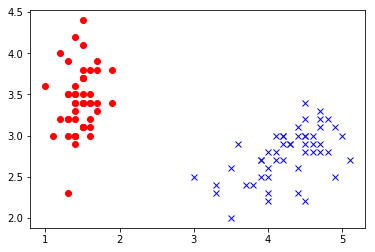

In [8]:
# визуализируем данные для setosa красным
x_setosa = df[df['species'] == 'setosa']['petal_length']
y_setosa = df[df['species'] == 'setosa']['sepal_width']
plt.plot(x_setosa, y_setosa, 'ro')

# визуализируем данные для versicolor красным
x_versicolor = df[df['species'] == 'versicolor']['petal_length']
y_versicolor = df[df['species'] == 'versicolor']['sepal_width']
plt.plot(x_versicolor, y_versicolor, 'bx')

plt.show()

In [9]:
x_setosa

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
5     1.7
6     1.4
7     1.5
8     1.4
9     1.5
10    1.5
11    1.6
12    1.4
13    1.1
14    1.2
15    1.5
16    1.3
17    1.4
18    1.7
19    1.5
20    1.7
21    1.5
22    1.0
23    1.7
24    1.9
25    1.6
26    1.6
27    1.5
28    1.4
29    1.6
30    1.6
31    1.5
32    1.5
33    1.4
34    1.5
35    1.2
36    1.3
37    1.5
38    1.3
39    1.5
40    1.3
41    1.3
42    1.3
43    1.6
44    1.9
45    1.4
46    1.6
47    1.4
48    1.5
49    1.4
Name: petal_length, dtype: float64

In [22]:
df = pd.read_csv('poker-hand-training.csv')
df.head(5)
df.tail(5)

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1
25008,1,7,3,11,3,3,4,8,3,7,1


In [23]:
X = np.array(df[['1', '10', '1.1', '11', '1.2', '13', '1.3', '12', '1.4','1.5']].T)
Y = np.array(df[['9']].T)
print(X.shape)
print(Y.shape)

(10, 25009)
(1, 25009)


In [10]:
# df = df[['petal_length', 'sepal_width', 'species']] # оставляем только два параметра
# df = df.sample(frac=1) # перемешиваем данные
# df['species'] = df['species'].astype('category').cat.codes # кодируем setosa и versicolor как 0 и 1
# df.head()

,petal_length,sepal_width,species
9,1.5,3.1,0
24,1.9,3.4,0
93,3.3,2.3,1
20,1.7,3.4,0
22,1.0,3.6,0


In [13]:
# отделяем features и labels
# X = np.array(df[['petal_length', 'sepal_width']].T, dtype=np.float64)
# Y = np.array(df['species'], dtype=np.float64)
# Y = np.reshape(Y, (1, 100))
# print(X.shape)
# print(Y.shape)

(2, 100)
(1, 100)


## Net input

$$ z = \sum{wx} + b $$

In [14]:
def net_input(W, X, b):
    return np.dot(W, X) + b

## Sigmoid

$$ f(z) = \frac{1}{1 + e^{-z}} $$

In [15]:
def sigmoid(Z):
    return 1.0/(1 + np.exp(-Z))

## Predict

Предсказываем класс 1, если модель уверена в ответе "1" более, чем на 50%, иначе 0.

In [16]:
def predict(s):
    if s > 0.5:
        return 1
    else:
        return 0

## Cost function

$$ L(\hat{y}, y) = - \frac{1}{m} \sum{y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})}}$$

In [17]:
def cost_function(W, X, b, Y):
    return -np.sum(Y * np.log(sigmoid(net_input(W, X, b))) + (1 - Y) * np.log(1 - sigmoid(net_input(W, X, b)))) / X.shape[1]

## Производные

$$ \frac{\partial L}{\partial w} = \frac{1}{m} \sum{(\hat{y} - y) x} $$

In [18]:
def cost_function_derivative_w(W, X, b, Y):
    return np.dot(sigmoid(net_input(W, X, b)) - Y, X.T) / X.shape[1]

$$ \frac{\partial L}{\partial b} = \frac{1}{m} \sum{(\hat{y} - y)} $$

In [19]:
def cost_function_derivative_b(W, X, b, Y):
    return np.sum(sigmoid(net_input(W, X, b)) - Y) / X.shape[1]

## Accuracy

Доля правильно предсказанных ответов

In [20]:
def accuracy(Y_hat, Y):
    return np.sum(Y_hat == Y) / len(Y)

In [ ]:
print(X.shape)
print(Y.shape)

X.shape
Y.shape

W = np.zeros((1, X.shape[0]))
b = 0

NUM_ITERATIONS = 1000
LEARNING_RATE = 10e-2

for i in range(NUM_ITERATIONS):
    print('{} step'.format(i))
    print(cost_function(W, X, b, Y))
    W = W - LEARNING_RATE * cost_function_derivative_w(W, X, b, Y)
    b = b - LEARNING_RATE * cost_function_derivative_b(W, X, b, Y)
    Y_pred = np.array([1 if sigmoid(net_input(W, x, b)) > 0.5 else 0 for x in X.T])
    print('Accuracy: {}'.format(accuracy(Y_pred, Y)))
    
print(sigmoid(net_input(W, X, b)))

(10, 25009)
(1, 25009)
0 step
0.6931471805599454
Accuracy: 10599.0
1 step
1.2927073156688955
Accuracy: 12493.0
2 step
3.754130415172571
Accuracy: 10599.0
3 step
4.135500316747444
Accuracy: 10599.0
4 step
0.6646282927925611
Accuracy: 10599.0
5 step
0.6649871012295121
Accuracy: 10608.0
6 step
0.6789487862974152
Accuracy: 10599.0
7 step
1.0298082280158092
Accuracy: 12493.0
8 step
3.5904529142399713
Accuracy: 10599.0
9 step
4.225596678633573
Accuracy: 10599.0
10 step
0.6702360410576378
Accuracy: 12493.0
11 step
0.8393574587566297
Accuracy: 10599.0
12 step
2.797081608524052
Accuracy: 12493.0
13 step
1.9079170132334533
Accuracy: 10599.0
14 step
4.809670611204966
Accuracy: 10599.0
15 step
0.9514413219599888
Accuracy: 12493.0
16 step
3.408835632550609
Accuracy: 10599.0
17 step
4.32293781081769
Accuracy: 10599.0
18 step
0.6907378182772582
Accuracy: 12493.0
19 step
1.3300089584228527
Accuracy: 10599.0
20 step
4.413192261464582
Accuracy: 10599.0
21 step
0.7204679529224655
Accuracy: 12493.0
22 ste

## Scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(X.T, Y.T.ravel())

In [ ]:
X.T

In [ ]:
y_pred = clf.predict([[500, 6.5]])

In [ ]:
y_pred